Extracting Dataset using Kaggle API

In [2]:
# installing the Kaggle library
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [8]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:27<00:00, 32.8MB/s]
100% 812M/812M [00:27<00:00, 31.0MB/s]


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [13]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.12258.jpg', 'dog.2592.jpg', 'dog.6930.jpg', 'cat.8237.jpg', 'dog.11524.jpg', 'dog.5680.jpg', 'dog.10895.jpg', 'dog.9247.jpg', 'cat.6437.jpg', 'cat.90.jpg', 'dog.10796.jpg', 'dog.6109.jpg', 'cat.27.jpg', 'dog.2381.jpg', 'cat.3467.jpg', 'dog.10611.jpg', 'cat.3692.jpg', 'dog.4626.jpg', 'dog.3891.jpg', 'cat.6946.jpg', 'cat.9086.jpg', 'cat.9099.jpg', 'dog.8376.jpg', 'dog.7805.jpg', 'dog.11799.jpg', 'dog.6414.jpg', 'dog.3543.jpg', 'dog.6627.jpg', 'dog.10072.jpg', 'dog.6699.jpg', 'dog.3108.jpg', 'dog.9885.jpg', 'cat.6470.jpg', 'dog.2292.jpg', 'dog.6523.jpg', 'dog.6480.jpg', 'dog.3240.jpg', 'cat.6739.jpg', 'cat.9535.jpg', 'dog.3711.jpg', 'dog.200.jpg', 'cat.5145.jpg', 'cat.5838.jpg', 'cat.1756.jpg', 'dog.11530.jpg', 'dog.11015.jpg', 'cat.1858.jpg', 'cat.4062.jpg', 'cat.11384.jpg', 'dog.4118.jpg', 'cat.2194.jpg', 'dog.62.jpg', 'cat.10953.jpg', 'cat.5387.jpg', 'dog.2281.jpg', 'cat.7198.jpg', 'dog.10150.jpg', 'dog.5157.jpg', 'cat.4664.jpg', 'cat.3758.jpg', 'dog.5911.jpg', 'cat.268.jpg', 'ca

Importing the Dependencies

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

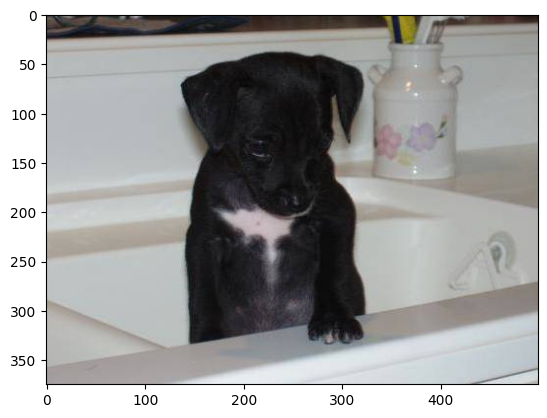

In [15]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

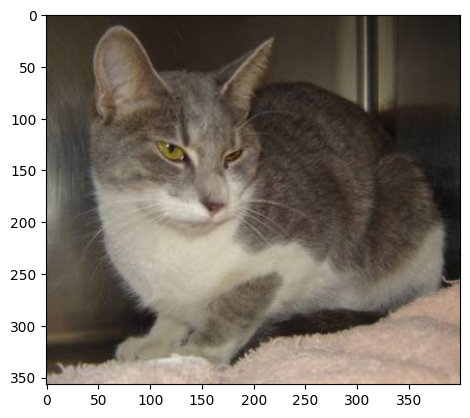

In [16]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
dog
cat
dog


In [18]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [19]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [20]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

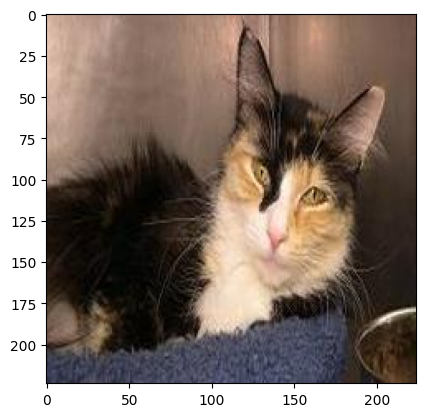

In [23]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.10012.jpg')
imgplt = plt.imshow(img)
plt.show()

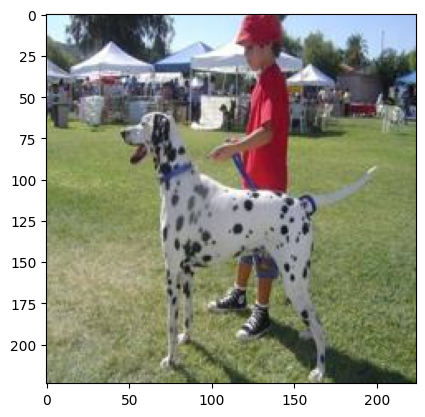

In [24]:
# display resized cat image
img = mpimg.imread('/content/image resized/dog.10004.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [25]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [26]:
print(filenames[0:5])
print(len(filenames))

['dog.12258.jpg', 'dog.2592.jpg', 'dog.6930.jpg', 'cat.8237.jpg', 'dog.11524.jpg']
2000


In [27]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [28]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 998 1002]


Converting all the resized images to numpy arrays

In [29]:
import cv2
import glob

In [30]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
print(dog_cat_images)

[[[[102  78  66]
   [103  81  69]
   [106  87  74]
   ...
   [ 93  88  85]
   [ 89  84  81]
   [ 87  82  79]]

  [[ 98  74  62]
   [ 98  76  64]
   [102  83  70]
   ...
   [ 90  85  82]
   [ 84  79  76]
   [ 81  76  73]]

  [[ 90  68  56]
   [ 93  71  59]
   [ 99  80  67]
   ...
   [ 93  88  85]
   [ 89  84  81]
   [ 87  82  79]]

  ...

  [[141 110  87]
   [158 130 106]
   [181 151 132]
   ...
   [ 57  66  70]
   [ 70  79  82]
   [ 62  71  74]]

  [[164 133 110]
   [176 148 124]
   [179 149 130]
   ...
   [ 63  69  74]
   [ 52  59  62]
   [ 44  52  52]]

  [[189 158 135]
   [188 160 136]
   [173 143 124]
   ...
   [ 65  72  75]
   [ 35  42  45]
   [ 31  39  39]]]


 [[[123 128 131]
   [124 129 132]
   [124 129 132]
   ...
   [128 125 121]
   [124 122 121]
   [130 128 127]]

  [[123 128 131]
   [123 128 131]
   [124 129 132]
   ...
   [125 122 118]
   [121 119 118]
   [126 124 123]]

  [[ 95  99 100]
   [ 95  99 100]
   [ 97 101 102]
   ...
   [123 120 116]
   [118 116 115]
   [121 119

In [32]:
type(dog_cat_images)

numpy.ndarray

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [37]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
print(X_train_scaled)

[[[[0.15686275 0.18823529 0.18431373]
   [0.17254902 0.20392157 0.2       ]
   [0.20784314 0.23921569 0.23529412]
   ...
   [0.27843137 0.34117647 0.36862745]
   [0.28627451 0.34901961 0.37647059]
   [0.29803922 0.36078431 0.38823529]]

  [[0.0745098  0.10588235 0.10196078]
   [0.0627451  0.09411765 0.09019608]
   [0.08235294 0.11372549 0.10980392]
   ...
   [0.28627451 0.34901961 0.37647059]
   [0.30196078 0.36470588 0.39215686]
   [0.31372549 0.37647059 0.40392157]]

  [[0.05490196 0.08627451 0.08235294]
   [0.01568627 0.04705882 0.04313725]
   [0.00392157 0.03529412 0.03137255]
   ...
   [0.31372549 0.37647059 0.40392157]
   [0.30588235 0.36862745 0.39607843]
   [0.29411765 0.35686275 0.38431373]]

  ...

  [[0.55686275 0.56862745 0.58431373]
   [0.58823529 0.6        0.61568627]
   [0.60392157 0.61568627 0.63137255]
   ...
   [0.29019608 0.38431373 0.49411765]
   [0.31372549 0.40784314 0.5254902 ]
   [0.33333333 0.42745098 0.54509804]]

  [[0.58039216 0.59215686 0.60784314]
   [0.6

**Building the Neural Network**

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

In [40]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.2259 - acc: 0.9038
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0823 - acc: 0.9700
Epoch 3/5
50/50 [==============================] - 54s 1s/step - loss: 0.0624 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 54s 1s/step - loss: 0.0533 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 52s 1s/step - loss: 0.0445 - acc: 0.9862


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 923ms/step - loss: 0.0393 - acc: 0.9825
Test Loss = 0.039300546050071716
Test Accuracy = 0.9825000166893005


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


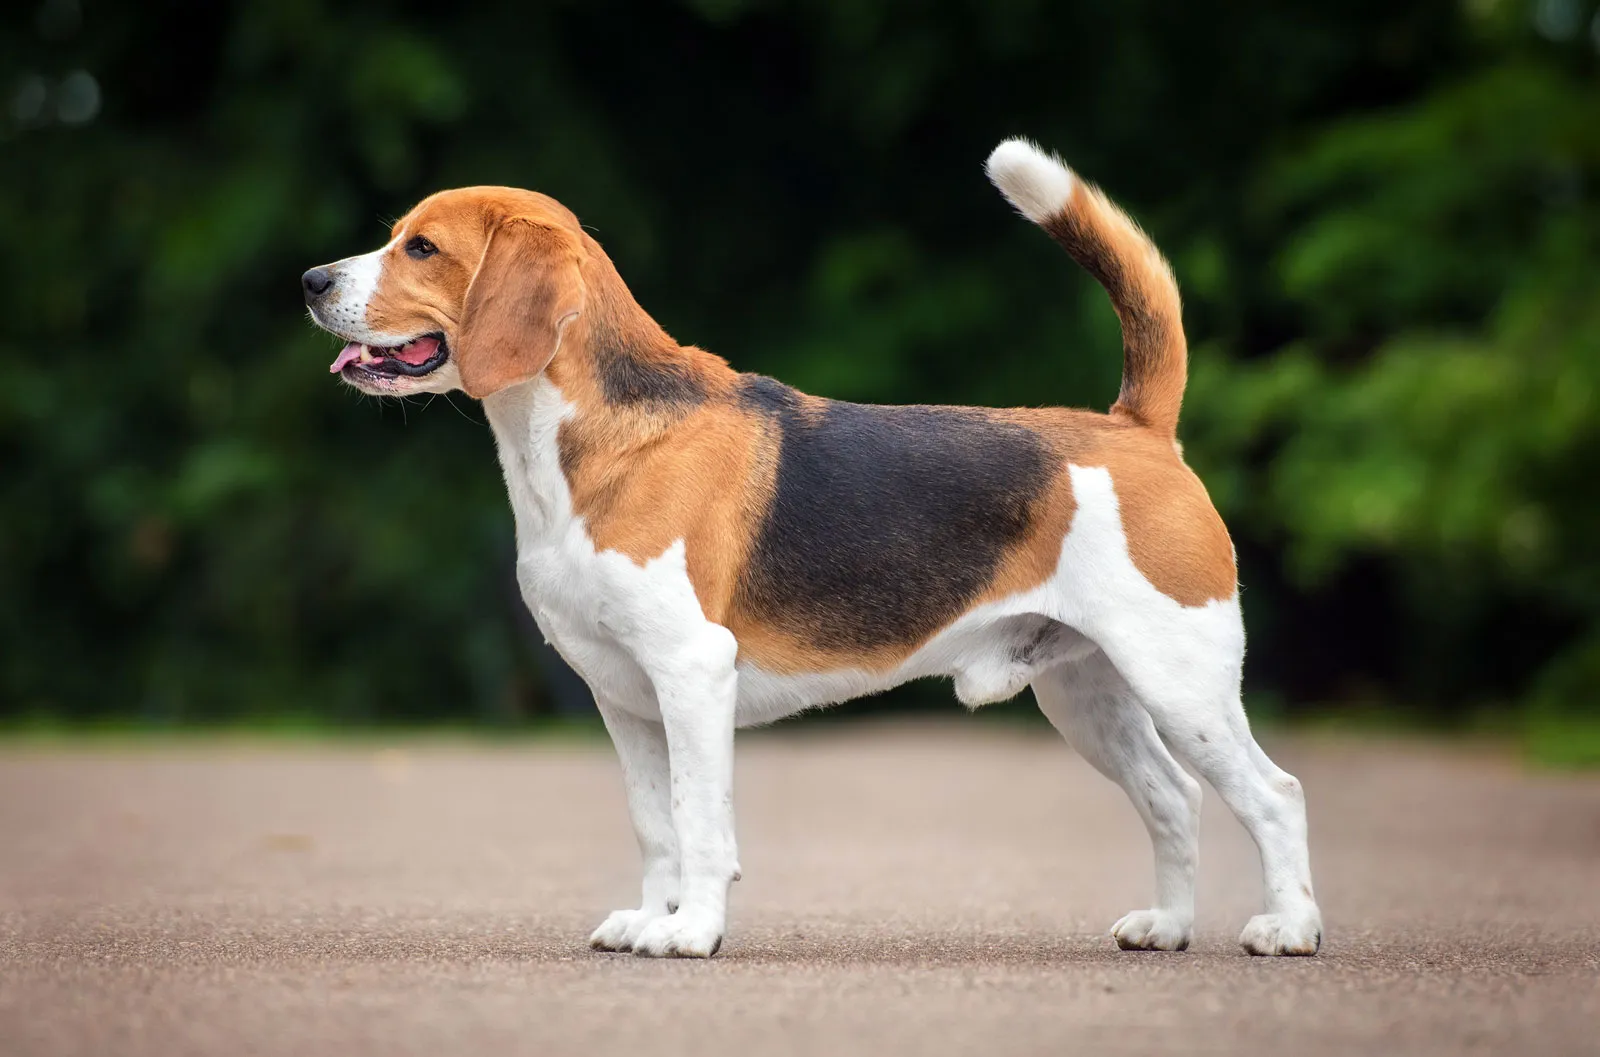

1/1 [==============================] - 1s 929ms/step
[[-2.9902694  4.6023273]]
1
The image represents a Dog


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


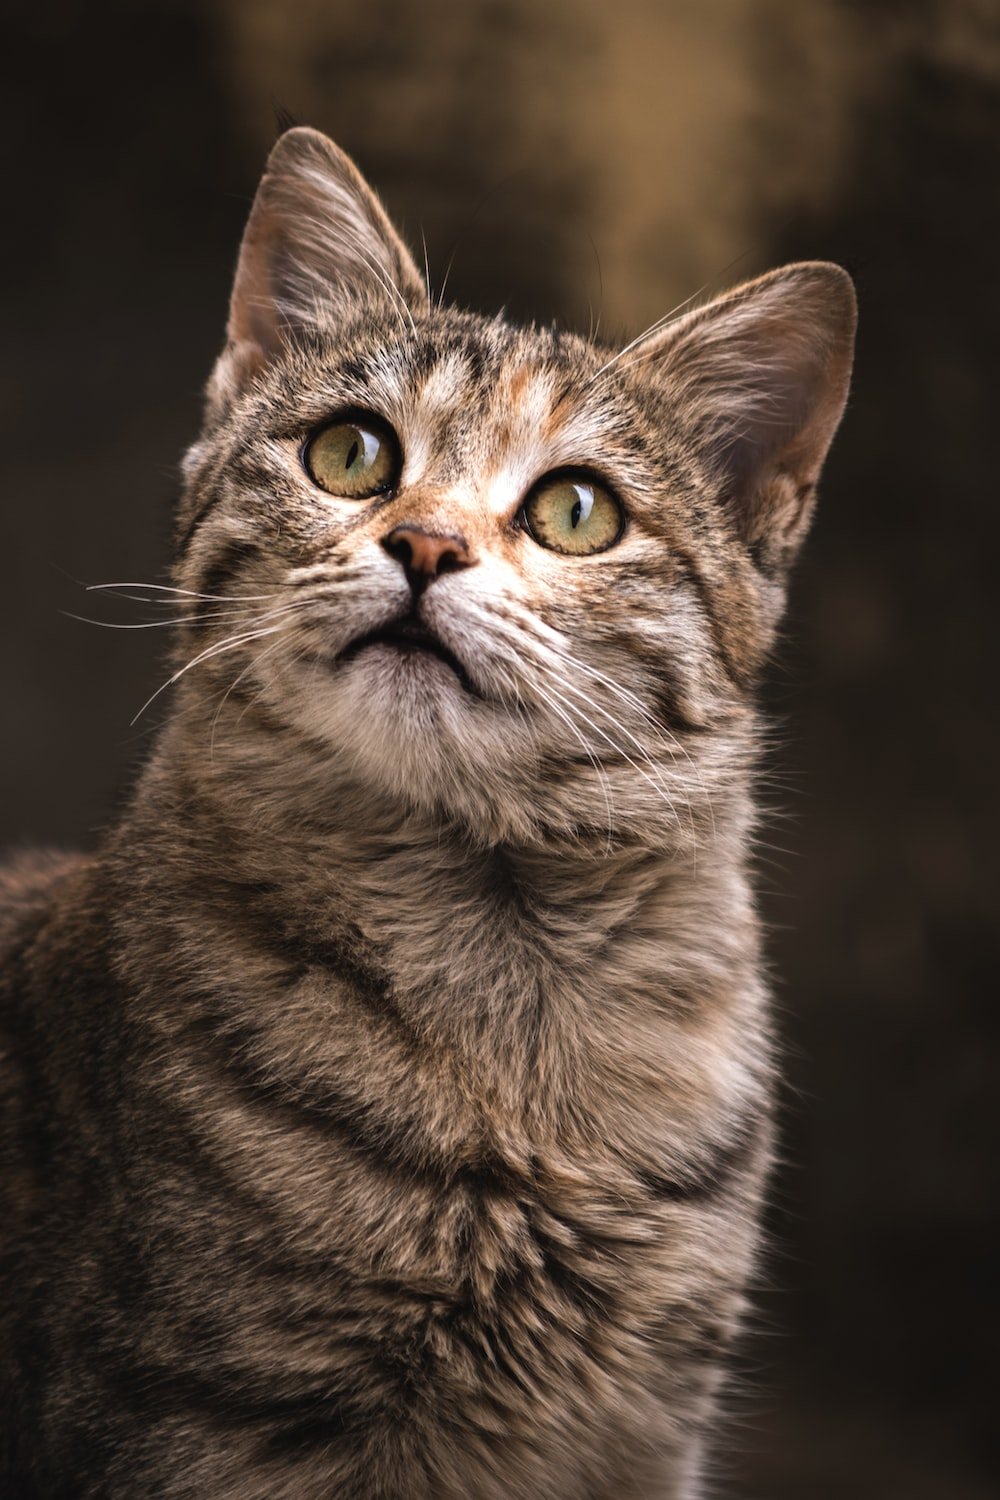

1/1 [==============================] - 0s 87ms/step
[[ 2.5088596 -3.3245966]]
0
The image represents a Cat


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')